In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Kelompok 5 PCD P3

In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import pandas as pd

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
IMAGE_SIZE = (256,256)
BATCH_SIZE = 32
CHANNELS = 3

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/corn-or-maize-leaf-disease-dataset/data",
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 4188 files belonging to 4 classes.


In [5]:
class_names = dataset.class_names

In [6]:
class_names = dataset.class_names
label_counts = {label: 0 for label in class_names}

for images, labels in dataset:
    for label in labels:
        label_name = class_names[label]
        label_counts[label_name] += 1

for label, count in label_counts.items():
    print(f"{label}: {count}")

Blight: 1146
Common_Rust: 1306
Gray_Leaf_Spot: 574
Healthy: 1162


In [7]:
# from sklearn.utils import resample
# class_counts = [1146, 1306, 574, 1162]
# target_count = min(class_counts)

# # Create empty lists to store the undersampled data
# undersampled_images = []
# undersampled_labels = []

# # Iterate over each class
# for i, class_name in enumerate(class_names):
#     class_images = []
#     class_labels = []
#     # Iterate over each batch in the dataset
#     for images, labels in dataset:
#         # Extract the images and labels corresponding to the current class
#         class_images.extend(images.numpy()[labels.numpy() == i])
#         class_labels.extend(labels.numpy()[labels.numpy() == i])
    
#     # Undersample the class
#     undersampled_images.extend(resample(class_images, n_samples=target_count, replace=False))
#     undersampled_labels.extend(resample(class_labels, n_samples=target_count, replace=False))

# # Create a new dataset with the undersampled data
# undersampled_dataset = tf.data.Dataset.from_tensor_slices((undersampled_images, undersampled_labels))
# undersampled_dataset = undersampled_dataset.shuffle(len(undersampled_images)).batch(BATCH_SIZE)

In [8]:
# undersampled_data_list = list(undersampled_dataset.as_numpy_iterator())

In [9]:
# import pickle
# file_path = "/kaggle/undersampled_dataset.pkl"

# # Save the undersampled_dataset to a file
# with open(file_path, 'wb') as file:
#     pickle.dump(undersampled_data_list, file)

In [10]:
def get_dataset(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=8)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size) 
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [11]:
train_ds,val_ds,test_ds = get_dataset(dataset)

In [12]:
print("Length of Training Dataset is",len(train_ds))
print("\nLength of Validation Dataset is",len(val_ds))
print("\nLength of Testing Dataset is",len(test_ds))

Length of Training Dataset is 104

Length of Validation Dataset is 13

Length of Testing Dataset is 14


In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip("horizontal_and_vertical"),
#     tf.keras.layers.RandomContrast(0.2),
# ])

In [34]:
from keras.layers import LeakyReLU, ELU

In [39]:
n_classes = 4
input_shape = (BATCH_SIZE,256,256,3)

model = models.Sequential([
    resize_and_rescale,
    layers.Flatten(),
    layers.Dense(256, activation='ELU'),
    layers.Dense(128, activation='ELU'),
    layers.Dense(64, activation='ELU'),
    layers.Dense(32, activation='ELU'),
    layers.Dense(n_classes, activation='softmax')
])
model.build(input_shape=input_shape)

In [40]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy']
)

In [43]:
history = model.fit(
  train_ds,
  epochs=15,
  batch_size=BATCH_SIZE,
  validation_data=val_ds
)

Epoch 1/15
104/104 [==============================] - 2s 21ms/step - loss: 0.3127 - accuracy: 0.8676 - val_loss: 0.3029 - val_accuracy: 0.8918
Epoch 2/15
104/104 [==============================] - 2s 21ms/step - loss: 0.3925 - accuracy: 0.8345 - val_loss: 0.3769 - val_accuracy: 0.8389
Epoch 3/15
104/104 [==============================] - 2s 21ms/step - loss: 0.3107 - accuracy: 0.8773 - val_loss: 0.3102 - val_accuracy: 0.8726
Epoch 4/15
104/104 [==============================] - 2s 21ms/step - loss: 0.3471 - accuracy: 0.8634 - val_loss: 0.3909 - val_accuracy: 0.8534
Epoch 5/15
104/104 [==============================] - 2s 21ms/step - loss: 0.3418 - accuracy: 0.8556 - val_loss: 0.4184 - val_accuracy: 0.8438
Epoch 6/15
104/104 [==============================] - 2s 21ms/step - loss: 0.3425 - accuracy: 0.8637 - val_loss: 0.4089 - val_accuracy: 0.8486
Epoch 7/15
104/104 [==============================] - 2s 21ms/step - loss: 0.5229 - accuracy: 0.8207 - val_loss: 0.3546 - val_accuracy: 0.8534

In [44]:
scores = model.evaluate(test_ds)

14/14 [==============================] - 0s 12ms/step - loss: 0.1837 - accuracy: 0.9219


In [23]:
model.save("model.h5")

In [45]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 flatten_6 (Flatten)         (None, 196608)            0         
                                                                 
 dense_30 (Dense)            (None, 256)               50331904  
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 4)                

# Test The Model (buat hasil dan pembahasan)

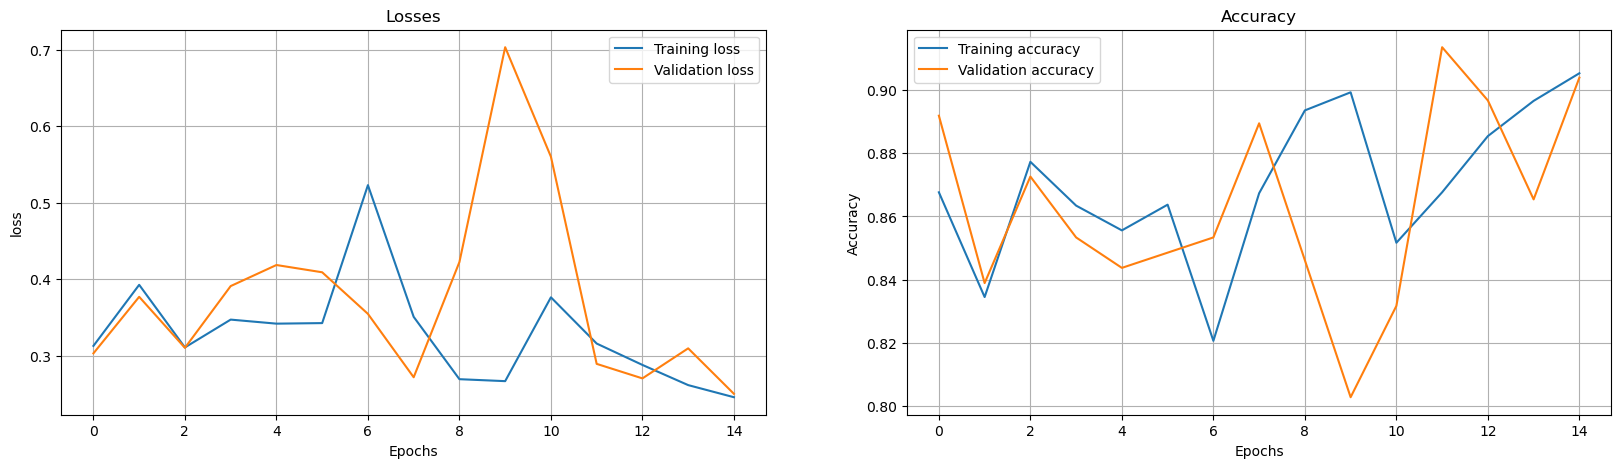

In [46]:
his_data = pd.DataFrame(history.history)
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(his_data.loss, label="Training loss")
plt.plot(his_data.val_loss, label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Losses")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(his_data.accuracy, label="Training accuracy")
plt.plot(his_data.val_accuracy, label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.grid()
plt.legend()

First Image to Predict :

Actual label: Healthy
1/1 [==============================] - 0s 173ms/step

Predicted label Healthy


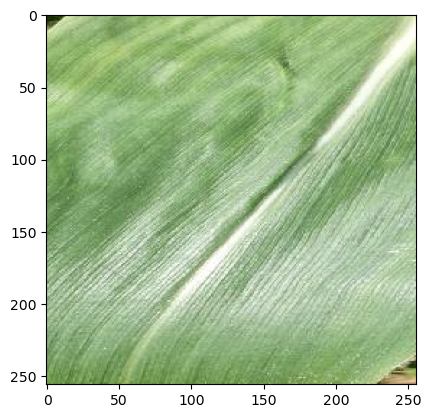

In [47]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("First Image to Predict :")
    plt.imshow(first_image)
    print("\nActual label:",class_names[first_label])
    batch_prediction = model. predict (images_batch) 
    print("\nPredicted label" ,class_names[np.argmax(batch_prediction[0])])

In [49]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict (img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)

    return predicted_class, confidence

1/1 [==============================] - 0s 20ms/step


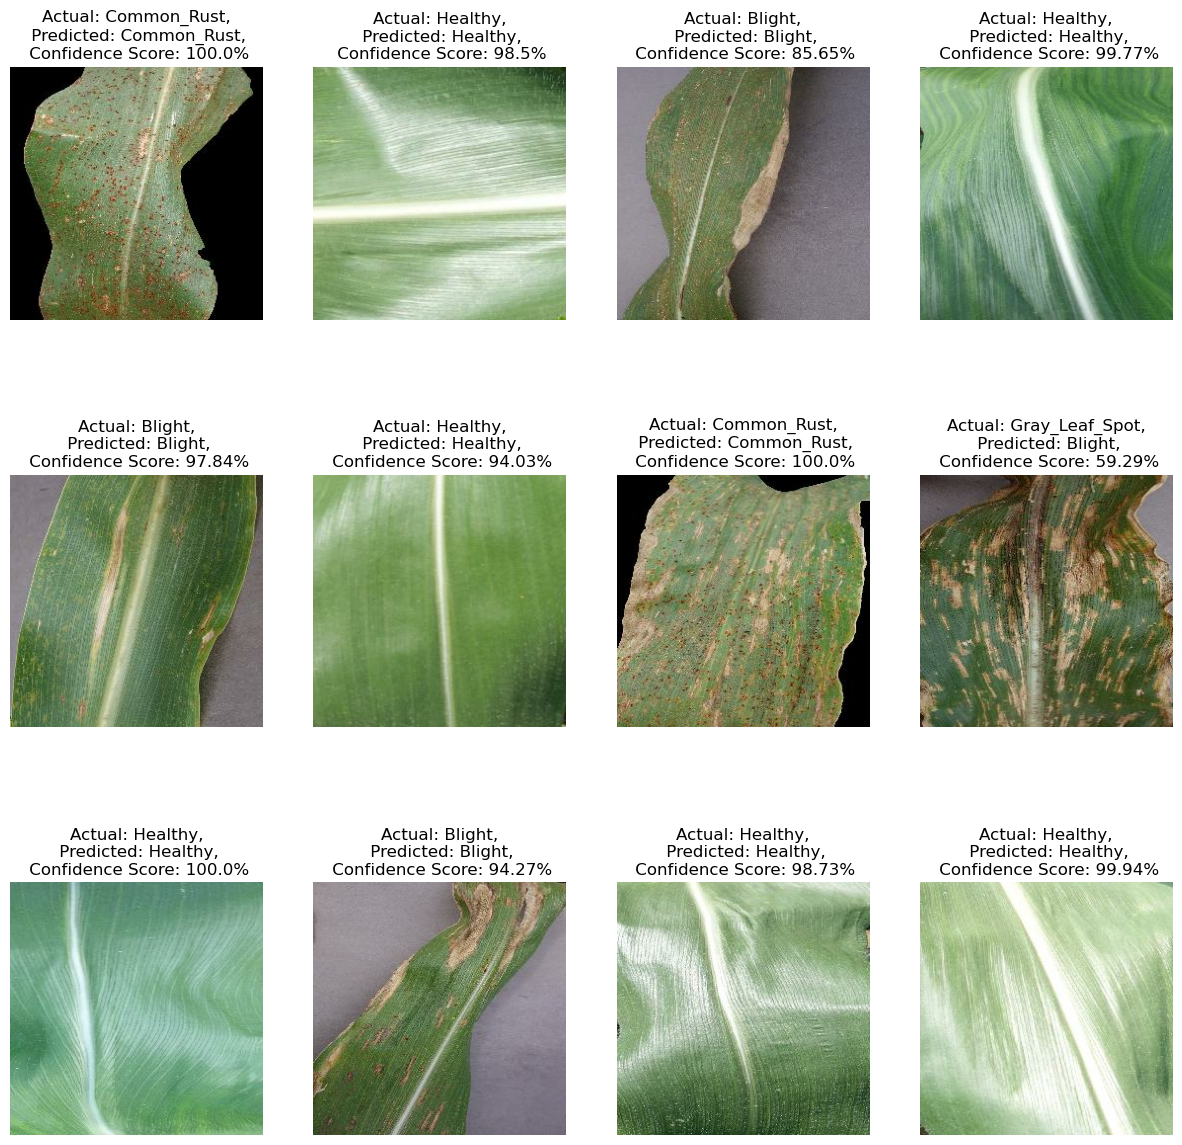

In [50]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class , confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence Score: {confidence}%")
        plt.axis("off")